In [1]:
import cv2
import matplotlib.pyplot as plt
from skimage import measure

from stl import mesh
import numpy as np

In [41]:
def rotate_image(image, angle):
    '''This function rotates image to a specific angle counter clockwise, and fill the empty space with white'''
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1],  borderValue=(255,255,255))
    return result

In [3]:
def crop_edge(img, num=0):
    '''Crop on edge'''
    points = np.argwhere(img == num)
    points = np.fliplr(points)
    x,y,w,h = cv2.boundingRect(points)
    x,y,w,h = x-10, y-10, w+20, h+20
    crop= img[y:y+h, x:x+w]
    return crop

In [4]:
def crop_shape(img, num):
    'crop on boundary'
    points = np.argwhere(img < num)
    y1,x1 = points.min(axis=0)
    y2,x2 = points.max(axis=0)
    crop= img[y1:y2, x1:x2]
    return crop

In [5]:
def compare_images(imageA, imageB, title):
    # show two images and compare its similarity
    sim = similarity(imageA, imageB)
    # setup the figure
    fig = plt.figure(title, figsize=(10,10))
    plt.suptitle(title+" \n Similarity : %.3f " %sim )
    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imageA, cmap = 'gray')
    plt.axis("off")
    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imageB, cmap = 'gray')
    plt.axis("off")
    # show the images
    plt.show()


In [42]:
def similarity(imageA, imageB):
    #compare a bit-wise similarity
    err = np.sum( abs((imageA.astype("float") - imageB.astype("float"))/255) )
    err /= float(imageA.shape[0] * imageA.shape[1])
    return round(1-err,3)

# Layer 185：

##  LWI Images

In [6]:
lwi_image = cv2.imread("/Users/anlandong/Desktop/Hackathon/LWI_Part1/Part01_B0185c.bmp")

In [15]:
#rotate the LWI image so that it's level. 
lwi_image = cv2.imread("/Users/anlandong/Desktop/Hackathon/LWI_Part1/Part01_B0185c.bmp" )
lwi_image = cv2.rotate(lwi_image, cv2.ROTATE_180)
lwi_image = rotate_image(lwi_image, 3)
lwi_gray = cv2.cvtColor(lwi_image, cv2.COLOR_BGR2GRAY)

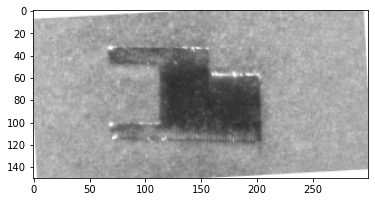

In [16]:
plt.imshow(lwi_image,cmap='gray')

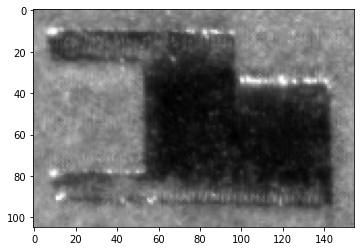

In [17]:
#crop a rough boundary of where the printed part is:
lwi_cropped = crop_edge(lwi_gray, 115)
plt.imshow(lwi_cropped, cmap='gray')

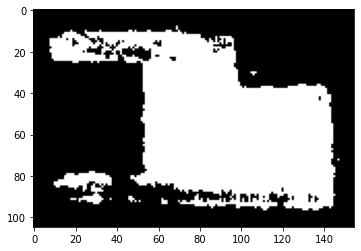

In [18]:
# Use colors to determine the background and the printed part
_, lwi_binary = cv2.threshold(lwi_cropped, 120,225, cv2.THRESH_BINARY_INV)
plt.imshow(lwi_binary, cmap='gray')

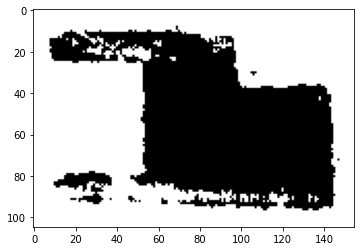

In [19]:
# invert the color
lwi_invert = cv2.bitwise_not(lwi_binary)
plt.imshow(lwi_invert,cmap='gray')

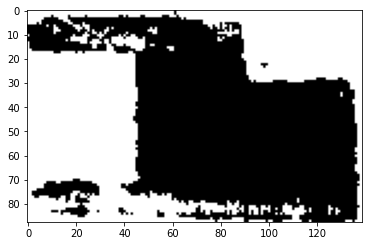

In [20]:
# crop the printed part on its detected edge:
lwi_cropped = crop_shape(lwi_invert,255 )
plt.imshow(lwi_cropped, cmap='gray')

## Read in Command Pattern:

In [21]:
cmd_image = cv2.imread('/Users/anlandong/Desktop/Hackathon/prototype/command_185.jpg')

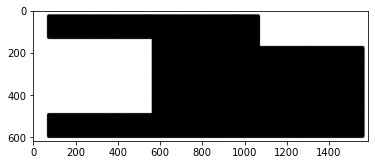

In [22]:
#resized_cmd = cv2.resize(cmd_gray, (1029,610))
cmd_gray = cv2.cvtColor(cmd_image, cv2.COLOR_BGR2GRAY)
plt.imshow(cmd_gray, cmap='gray')

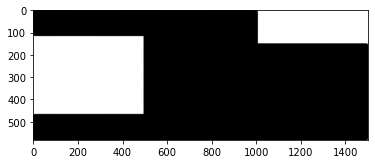

In [26]:
cmd_gray = cv2.cvtColor(cmd_image, cv2.COLOR_RGB2GRAY)
cmd_cropped = crop_shape(cmd_gray, 255)
plt.imshow(cmd_cropped, cmap='gray')

# Read in DAQ Image:

In [27]:
daq_image = cv2.imread('/Users/anlandong/Desktop/Hackathon/prototype/daq_185.png')

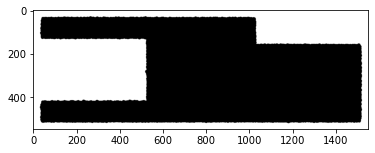

In [28]:
daq_gray = cv2.cvtColor(daq_image, cv2.COLOR_RGB2GRAY)
plt.imshow(daq_gray,cmap='gray')

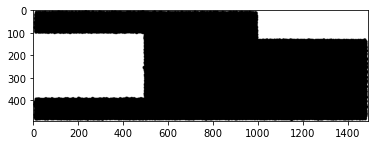

In [29]:
#daq_crop = crop_edge(daq_gray,400)
daq_cropped = crop_shape(daq_gray,255)
plt.imshow(daq_cropped, cmap='gray')

## Image Difference:

In [30]:
resize_cmd = cv2.resize(cmd_cropped,(1029//3,610//3) )
resize_daq = cv2.resize(daq_cropped,(1029//3,610//3) )
resize_lwi = cv2.resize(lwi_cropped, (1029//3,610//3) )

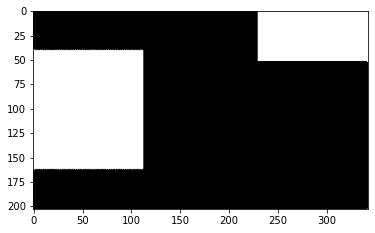

In [31]:
plt.imshow(resize_cmd, cmap='gray')

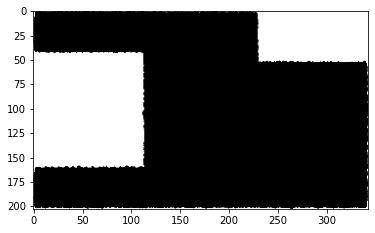

In [32]:
plt.imshow(resize_daq,cmap='gray')

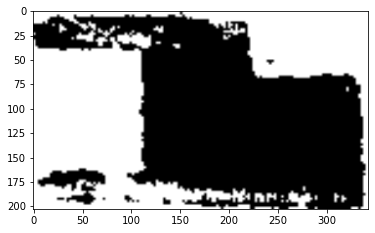

In [33]:
plt.imshow(resize_lwi, cmap='gray')

In [35]:
similarity(resize_cmd, resize_daq)

0.899

In [36]:
similarity(resize_cmd, resize_lwi)

0.761

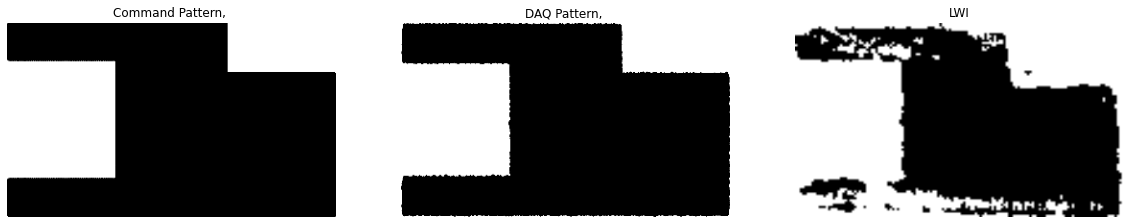

In [37]:
fig = plt.figure("Images", figsize=(20,20))
images = ('Command Pattern, ', resize_cmd), ('DAQ Pattern, ', resize_daq), ('LWI', resize_lwi)
for (i, (name, image)) in enumerate(images):
    ax=fig.add_subplot(1,3,i+1)
    ax.set_title(name)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    

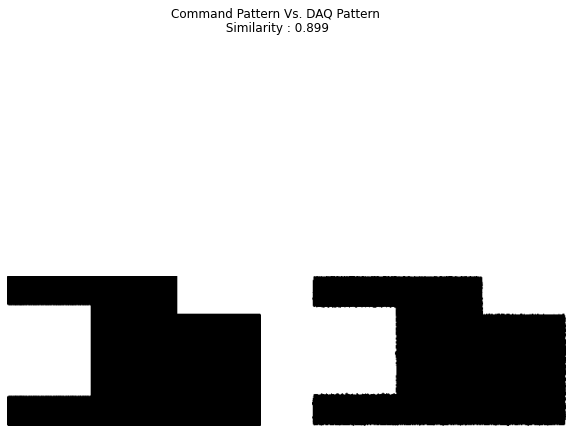

In [38]:
compare_images(resize_cmd, resize_daq, 'Command Pattern Vs. DAQ Pattern')

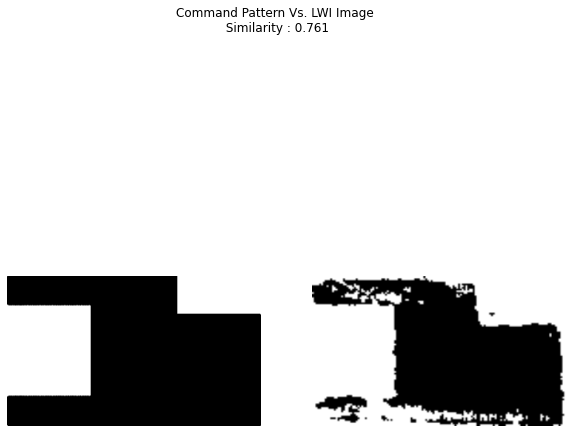

In [39]:
compare_images(resize_cmd, resize_lwi, 'Command Pattern Vs. LWI Image')

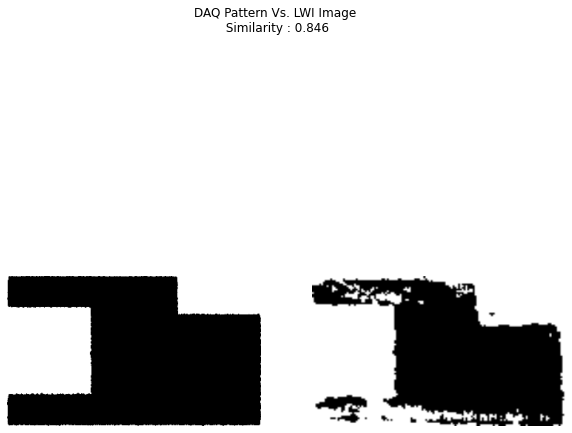

In [40]:
compare_images(resize_daq, resize_lwi, 'DAQ Pattern Vs. LWI Image')